In [1]:
import os, json
import numpy as np

walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
trial_to_delta = {}

for dirpath, dirnames, filenames in walk:
    if "testingSetScores.json" in filenames:
        data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
        # sort data
        data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
        deltas = []
        for k in data:
            initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
            optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
            delta = optimized_prompt_score - initial_prompt_score
            deltas.append(delta)
            
        print(deltas)
        trial_to_delta[dirpath] = deltas
        avg_change = sum(deltas) / len(deltas)
        print(f"Avg change: {dirpath}: {avg_change}")
        
print(f"All deltas: {trial_to_delta}")
for k,v in trial_to_delta.items():
    mean = np.mean(v)
    std = np.std(v)
    ci = 1.96 * std / np.sqrt(len(v))
    print(f"{k}, Mean: {np.mean(v)}")
    print(f"{k}, Std: {np.std(v)}")
    print(f"{k}, CI: {ci}")
    

[-72.94460995211062, 56.03021053472396, -36.51243121731389, 50.721743738619104, -17.07049668964392, 17.20640143901621, 7.964405662367916, 0.8836039974523402, 3.7580525100854025, -1.575640834355795, 7.18243820646703, 4.664187187336527, -0.2084214337747632, 2.582271245464934, -67.44086846193923, 74.71682065501966, 0.059545182768452776, 0.024326226224658853]
Avg change: ./trial5: 1.6689743331337763
[-68.5248848122867, 56.145446838296216, -36.30669269233926, 51.226993725482856, -19.764592173338556, 55.790807866712456, 7.954422006361693, 3.810776279326255, 15.458301969249014, 6.702652702569409, 7.247396250531494, 4.731641972003645, 0.03569297903735702, 4.12853511675673, -73.0170768997816, 75.59124271365616, 0.07100836757288675, 0.03179057440349098]
Avg change: ./trial4: 5.07297015467853
[-71.55131645813086, 57.92061414400165, -29.590083124161403, 51.4140140826997, -19.566561890553977, 59.79857241796086, 7.616225645436369, 5.700877121057918, 3.8314657400004464, -4.361845337568063, 8.38625740

In [2]:
seed_to_score = {64: 25.33227960073522, 32:15.675042856565009, 8: 6.140114001286218, 4: 5.072970154678531, 1: 1.6689743331337756}
ci = np.array([11.937675711417429, 15.639359100769239, 17.12489171772038, 17.66872765817403, 16.583755253973248])

import numpy as np

# x is the keys of the seed_to_score dict, y is the values
x = list(seed_to_score.keys())
y = list(seed_to_score.values())
print(f"Mean: {np.mean(y)}")
print(f"Confidence interval: {ci}")

Mean: 10.777876189279748
Confidence interval: [11.93767571 15.6393591  17.12489172 17.66872766 16.58375525]


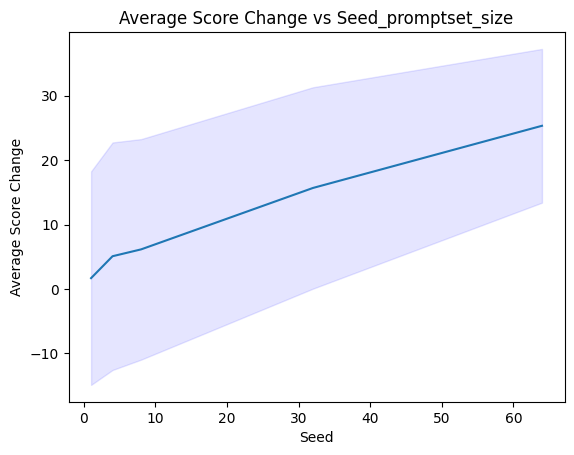

In [3]:
# plot seed_to_score as line graph
import matplotlib.pyplot as plt
plt.plot(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("Seed")
plt.ylabel("Average Score Change")
plt.title("Average Score Change vs Seed_promptset_size")
# plt.savefig("average_score_change_vs_seed.png")
plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.show()

# # bar graph
# plt.bar(seed_to_score.keys(), seed_to_score.values())
# plt.xlabel("Seed")
# plt.ylabel("Average Score Change")
# plt.title("Average Score Change vs Seed_promptset_size")
# # plt.savefig("average_score_change_vs_seed_bar.png")
# plt.show()